In [ ]:
%pip install requests
%pip install selenium
%pip install BeautifulSoup4
%pip install pandas

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
   ---------------------------------------- 0.0/99.9 kB ? eta -:--:--
   ------------------------ --------------- 61.4/99.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 99.9/99.9 kB 1.9 MB/s eta 0:00:00
Using cached idna-3.6-py3-none-any.whl (61 kB)
Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ----------------

In [ ]:
import requests
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.keys import Keys

In [ ]:
url="https://www.airlinequality.com/airline-reviews/british-airways"

In [ ]:
reviews=[]
description=[]
date=[]
country=[]
recommended=[]
res=requests.get("https://www.airlinequality.com/airline-reviews/british-airways/page/303")
soup=BeautifulSoup(res.content,"html.parser")
re=[]
print(soup.find_all("div",{"itemprop":"reviewRating"})[0])
# print(len(soup.find_all("div",{"itemprop":"reviewRating"})))
# for s in range(len(soup.find_all("div",{"itemprop":"reviewRating"}))):
#    len(soup.find_all("div",{"itemprop":"reviewRating"})))<10:

   # print(int(soup.find_all("div",{"itemprop":"reviewRating"})[s].span.get_text()))









<div class="rating-10" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
<span itemprop="ratingValue">3</span>/<span itemprop="bestRating">10</span>
</div>


In [ ]:
x='2'
x.isdigit()

True

In [ ]:
print(res.content)

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en-GB">\n<!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n\n    <title>British Airways Customer Reviews - SKYTRAX</title>\n\n    <!-- Google Chrome Frame for IE -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <!-- mobile meta -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport"\n        content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n    <!-- icons & favicons -->\n    <link rel="apple-touch-icon" href="https://www.airlinequal

In [ ]:
reviews=[]
description=[]
date=[]
country=[]
recommended=[]
stars=[]
page=[]
for i in range(1,361):
    res=requests.get("https://www.airlinequality.com/airline-reviews/british-airways/page/{}".format(i))

    soup=BeautifulSoup(res.content,"html.parser")
    #print(len(soup.find_all("h2", {"class": "text_header"})))

    for r in range(len(soup.find_all("h2", {"class": "text_header"}))):
        reviews.append(soup.find_all("h2", {"class": "text_header"})[r].get_text().strip('\"'))
    for d in range(len(soup.find_all("div", {"class": "text_content"}))):
        if "|" in soup.find_all("div", {"class": "text_content"})[d].get_text():

            description.append(soup.find_all("div", {"class": "text_content"})[d].get_text().split("|")[1])
        else:
            description.append(soup.find_all("div", {"class": "text_content"})[d].get_text())
    for dt in soup.find_all("time", {"itemprop": "datePublished"}):
        date.append(dt.get_text())
    for ct in range(len(soup.find_all("h3"))):
        country.append(soup.find_all("h3")[ct].span.next_sibling.get_text().strip(" ()"))
    for rec in soup.find_all("td",{"class":"review-rating-header recommended"}):
        recommended.append(rec.find_next_sibling('td').get_text())
    for s in range(len(soup.find_all("div",{"itemprop":"reviewRating"}))):
        if i!=360 and (len(soup.find_all("div",{"itemprop":"reviewRating"})))<10:
            page.append(soup.find_all("div",{"itemprop":"reviewRating"})[s].span.get_text())
            if soup.find_all("div",{"itemprop":"reviewRating"})[s].span.get_text().isdigit():
                stars.append(int(soup.find_all("div",{"itemprop":"reviewRating"})[s].span.get_text()))
            else:
                stars.append(None)
        else:
            stars.append(int(soup.find_all("div",{"itemprop":"reviewRating"})[s].span.get_text()))









In [ ]:
set(stars)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:

print(len(reviews),len(description),len(date),len(country),len(stars))


3600 3600 3600 3600 3595


In [ ]:
final=pd.DataFrame()
final["reviews"]=reviews[:len(stars)]
final["description"]=description[:len(stars)]
final["country"]=country[:len(stars)]
final["date"]=date[:len(stars)]
final["ratings"]=stars
final['recommended']=recommended[:len(stars)]

In [ ]:
final

,reviews,description,country,date,ratings,recommended
0,Zero customer service,The plane was extremely dirty with chocolate...,Ireland,15th January 2024,1,no
1,"baggage arrival nearly took 1.5 hours""",Overall journey wasn’t bad however at the end...,United Kingdom,12th January 2024,4,no
2,Overall very satisfied,Overall very satisfied. Ground staff member ...,United Kingdom,12th January 2024,9,yes
3,"airline is a total disgrace""",As always when I fly BA it was a total shamb...,Spain,9th January 2024,1,no
4,we were pleased with the service,First time using BA business class but we we...,United Kingdom,7th January 2024,9,yes
...,...,...,...,...,...,...
3590,British Airways customer review,Flew BA 025 Heathrow to Hong Kong in First Cla...,United Kingdom,6th July 2014,5,yes
3591,British Airways customer review,Travelled from OZ to watch start of TDF in Lee...,Australia,6th July 2014,4,no
3592,British Airways customer review,Travelled with my husband sister and brother i...,Australia,6th July 2014,7,yes
3593,British Airways customer review,Flew YYZ to LHR on 1st July. Booked WT+ but wa...,United Kingdom,6th July 2014,10,yes


In [ ]:
%pip install matplotlib
%pip install nltk
%pip install ipywidgets
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.8 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Quick EDA

<Axes: title={'center': 'count of reviews by stars'}, xlabel='ratings'>

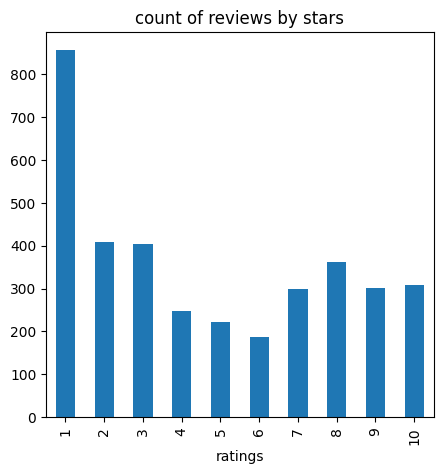

In [ ]:
final['ratings'].value_counts().sort_index()\
    .plot(kind='bar',title="count of reviews by stars",figsize=(5,5))

In [ ]:
final['recommended'].value_counts()

recommended
no     2156
yes    1439
Name: count, dtype: int64

<Axes: title={'center': 'recommendation count'}, xlabel='recommended'>

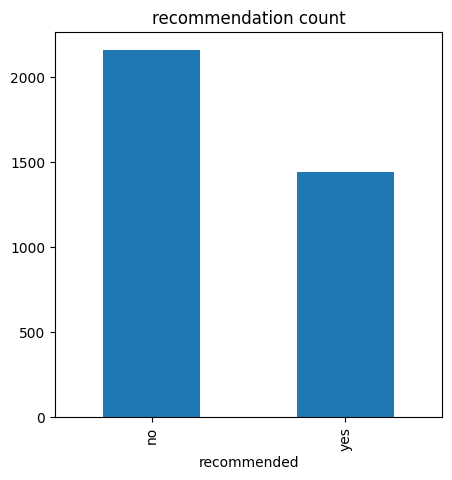

In [ ]:
final['recommended'].value_counts().sort_index()\
    .plot(kind='bar',title="recommendation count",figsize=(5,5))

# Basic NLTK

In [ ]:
ex=final['description'][100]
print(ex)

  I arrived at the airport about 2.5 hours before takeoff to have more than about time to get checked in, go through security, etc. All that went without any issues. Being that I was relatively early at the gate, I was one of the first passengers there. After some time boarding had opened. First the business class got called up, then families with children and disabled people. A couple minutes into the boarding they started to call up people, one by one, by name. Then there was an announcement: they won’t let anyone in anymore. Me and about fifty other people were still standing at the gate not being let in. The reason, they said, was that the plane was short staffed (Later I discovered, speaking to a manager, that not only the flight was short staffed but also it was overbooked). After the announcement people were getting angry because they wouldn’t be let in anymore. Nothing changed and everyone was sent away. I had a connecting flight later that day that I was going to miss because 

In [27]:
import nltk

tokens=nltk.word_tokenize(ex)
tokens[:10]


NameError: name 'ex' is not defined

In [ ]:
#pos
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
print(tagged[:20])

[('I', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('airport', 'NN'), ('about', 'IN'), ('2.5', 'CD'), ('hours', 'NNS'), ('before', 'IN'), ('takeoff', 'NN'), ('to', 'TO'), ('have', 'VB'), ('more', 'JJR'), ('than', 'IN'), ('about', 'RB'), ('time', 'NN'), ('to', 'TO'), ('get', 'VB'), ('checked', 'VBN'), ('in', 'IN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Varundatt Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#NER
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
# def extract_entities(tree):
#     entities = []
#     if hasattr(tree, 'label') and tree.label:
#         entities.append(' '.join([child[0] for child in tree]))
#     else:
#         for child in tree:
#             entities.extend(extract_entities(child))
#     return entities

# nltk.download('maxent_ne_chunker')
# nltk.download('words')
ne=nltk.ne_chunk(tagged)
print(ne)
# Extract and print named entities
# entities = extract_entities(ne)
# print("Named Entities:", entities)

(S
  I/PRP
  arrived/VBD
  at/IN
  the/DT
  airport/NN
  about/IN
  2.5/CD
  hours/NNS
  before/IN
  takeoff/NN
  to/TO
  have/VB
  more/JJR
  than/IN
  about/RB
  time/NN
  to/TO
  get/VB
  checked/VBN
  in/IN
  ,/,
  go/VBP
  through/IN
  security/NN
  ,/,
  etc/FW
  ./.
  All/PDT
  that/DT
  went/VBD
  without/IN
  any/DT
  issues/NNS
  ./.
  Being/VBG
  that/IN
  I/PRP
  was/VBD
  relatively/RB
  early/JJ
  at/IN
  the/DT
  gate/NN
  ,/,
  I/PRP
  was/VBD
  one/CD
  of/IN
  the/DT
  first/JJ
  passengers/NNS
  there/RB
  ./.
  After/IN
  some/DT
  time/NN
  boarding/NN
  had/VBD
  opened/VBN
  ./.
  First/NNP
  the/DT
  business/NN
  class/NN
  got/VBD
  called/VBN
  up/RP
  ,/,
  then/RB
  families/NNS
  with/IN
  children/NNS
  and/CC
  disabled/JJ
  people/NNS
  ./.
  A/DT
  couple/NN
  minutes/NNS
  into/IN
  the/DT
  boarding/NN
  they/PRP
  started/VBD
  to/TO
  call/VB
  up/RP
  people/NNS
  ,/,
  one/CD
  by/IN
  one/CD
  ,/,
  by/IN
  name/NN
  ./.
  Then/RB
  there/EX
  w

[nltk_data] Downloading package punkt to C:\Users\Varundatt
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Varundatt Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Varundatt
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


# VADER Sentiment scoring

In [54]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
res={}
final=pd.read_csv('ba_final')
final = final.drop(final[final['reviews'] == 'British Airways customer review'].index)

final



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,reviews,description,country,date,ratings,recommended
0,0,Zero customer service,The plane was extremely dirty with chocolate...,Ireland,15th January 2024,1,no
1,1,"baggage arrival nearly took 1.5 hours""",Overall journey wasn’t bad however at the end...,United Kingdom,12th January 2024,4,no
2,2,Overall very satisfied,Overall very satisfied. Ground staff member ...,United Kingdom,12th January 2024,9,yes
3,3,"airline is a total disgrace""",As always when I fly BA it was a total shamb...,Spain,9th January 2024,1,no
4,4,we were pleased with the service,First time using BA business class but we we...,United Kingdom,7th January 2024,9,yes
...,...,...,...,...,...,...,...
2786,2786,need to up their game,"On the upper deck on BA 282 (Aug 31st), althou...",United Kingdom,2nd September 2015,3,no
2787,2787,our last flight with British Airways,I can confirm what has been reported earlier a...,Germany,1st September 2015,1,no
2788,2788,supposed legacy airline,Thoroughly disappointed with this supposed leg...,United Kingdom,1st September 2015,2,no
2789,2789,staff amiable and present,"Plane was clean, staff amiable and present wit...",Australia,1st September 2015,7,yes


In [56]:
sia=SentimentIntensityAnalyzer()
for i,rows in tqdm(final.iterrows(),total=len(final)):
    des=rows['reviews']
    res[des]=sia.polarity_scores(des)
vadars=pd.DataFrame(res).T


  0%|          | 0/2778 [00:00<?, ?it/s]

In [57]:
vadars=vadars.reset_index().rename(columns={'index':'description'})
vadars=vadars.merge(final,how='left')

In [58]:
#SENTIMENT SCORES AND META DATA
vadars

,description,neg,neu,pos,compound,Unnamed: 0,reviews,country,date,ratings,recommended
0,The plane was extremely dirty with chocolate...,0.128,0.828,0.044,-0.9127,0.0,Zero customer service,Ireland,15th January 2024,1.0,no
1,Overall journey wasn’t bad however at the end...,0.151,0.849,0.000,-0.8750,1.0,"baggage arrival nearly took 1.5 hours""",United Kingdom,12th January 2024,4.0,no
2,Overall very satisfied. Ground staff member ...,0.022,0.863,0.115,0.8724,2.0,Overall very satisfied,United Kingdom,12th January 2024,9.0,yes
3,As always when I fly BA it was a total shamb...,0.161,0.808,0.031,-0.9482,3.0,"airline is a total disgrace""",Spain,9th January 2024,1.0,no
4,First time using BA business class but we we...,0.073,0.764,0.163,0.9493,4.0,we were pleased with the service,United Kingdom,7th January 2024,9.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
5486,need to up their game,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
5487,our last flight with British Airways,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
5488,supposed legacy airline,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
5489,staff amiable and present,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='ratings', ylabel='compound'>

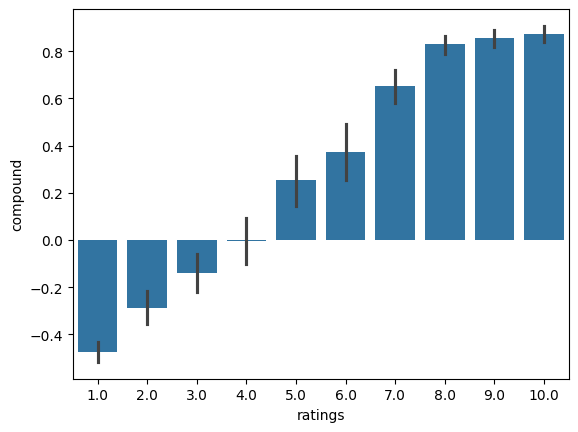

In [59]:
"""Assumption :
Score of 10 will have more positive compound value than score of 1
"""
import seaborn as sns
sns.barplot(data=vadars,x='ratings',y='compound')


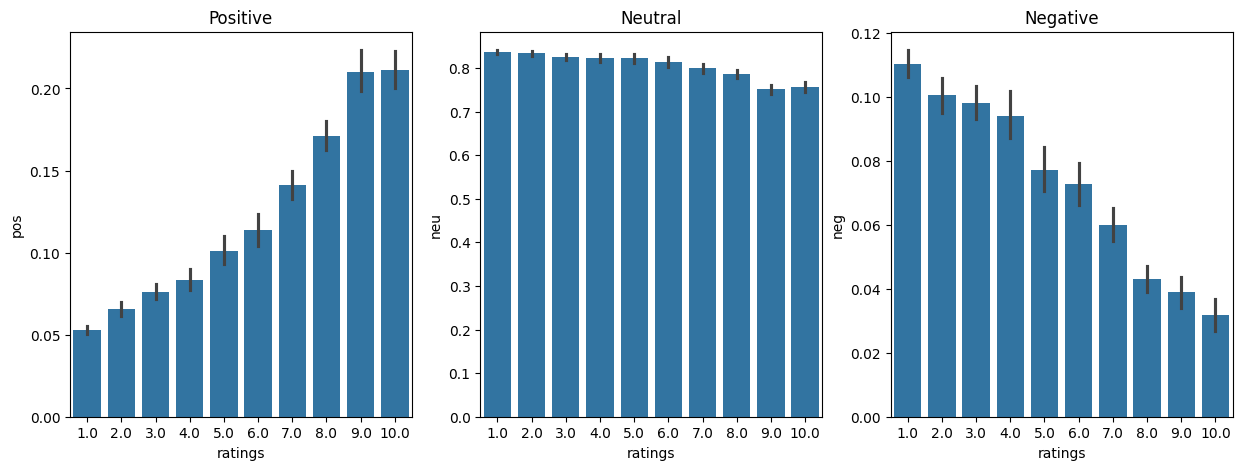

In [60]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vadars,x='ratings',y='pos',ax=axs[0])
sns.barplot(data=vadars,x='ratings',y='neu',ax=axs[1])
sns.barplot(data=vadars,x='ratings',y='neg',ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

# ROBERTA

In [ ]:
final.to_csv('ba_final')

In [1]:
%pip install transformers
%pip install scipy
%pip install torch

In [13]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd
# final_df=pd.read_csv('ba_final')

In [17]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
import numpy
def polarity_roberta(ex):
  encoded_txt=tokenizer(ex,return_tensors='pt')
  output=model(**encoded_txt)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
      "roberta_neg":scores[0],
      "roberta_neu":scores[1],
      "roberta_pos":scores[2]
  }
  return scores_dict

In [61]:
final

,Unnamed: 0,reviews,description,country,date,ratings,recommended
0,0,Zero customer service,The plane was extremely dirty with chocolate...,Ireland,15th January 2024,1,no
1,1,"baggage arrival nearly took 1.5 hours""",Overall journey wasn’t bad however at the end...,United Kingdom,12th January 2024,4,no
2,2,Overall very satisfied,Overall very satisfied. Ground staff member ...,United Kingdom,12th January 2024,9,yes
3,3,"airline is a total disgrace""",As always when I fly BA it was a total shamb...,Spain,9th January 2024,1,no
4,4,we were pleased with the service,First time using BA business class but we we...,United Kingdom,7th January 2024,9,yes
...,...,...,...,...,...,...,...
2786,2786,need to up their game,"On the upper deck on BA 282 (Aug 31st), althou...",United Kingdom,2nd September 2015,3,no
2787,2787,our last flight with British Airways,I can confirm what has been reported earlier a...,Germany,1st September 2015,1,no
2788,2788,supposed legacy airline,Thoroughly disappointed with this supposed leg...,United Kingdom,1st September 2015,2,no
2789,2789,staff amiable and present,"Plane was clean, staff amiable and present wit...",Australia,1st September 2015,7,yes


In [63]:
res_roberta={}
res_vadar={}
res={}
for i,rows in tqdm(final.iterrows(),total=len(final)):
    try:
      id=rows['Unnamed: 0']
      des=rows['reviews']
      res_vadar=sia.polarity_scores(des)
      res_roberta=polarity_roberta(des)
      both={**res_vadar,**res_roberta}
      res[des]=both
    except RuntimeError:
      print(f"Broke for id {id}")


  0%|          | 0/2778 [00:00<?, ?it/s]

In [64]:
result_df=pd.DataFrame(res).T
result_df=result_df.reset_index().rename(columns={'index':'reviews'})
result_df=result_df.merge(final,how='left')

In [68]:
result_df=result_df.drop("Unnamed: 0",axis=1)
result_df

,reviews,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,description,country,date,ratings,recommended
0,Zero customer service,0.000,1.000,0.000,0.0000,0.827337,0.144217,0.028446,The plane was extremely dirty with chocolate...,Ireland,15th January 2024,1,no
1,"baggage arrival nearly took 1.5 hours""",0.000,1.000,0.000,0.0000,0.406579,0.553461,0.039960,Overall journey wasn’t bad however at the end...,United Kingdom,12th January 2024,4,no
2,Overall very satisfied,0.000,0.393,0.607,0.4754,0.010838,0.037029,0.952133,Overall very satisfied. Ground staff member ...,United Kingdom,12th January 2024,9,yes
3,"airline is a total disgrace""",0.516,0.484,0.000,-0.4939,0.926895,0.064432,0.008673,As always when I fly BA it was a total shamb...,Spain,9th January 2024,1,no
4,we were pleased with the service,0.000,0.633,0.367,0.4404,0.005571,0.032223,0.962206,First time using BA business class but we we...,United Kingdom,7th January 2024,9,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,need to up their game,0.000,1.000,0.000,0.0000,0.585494,0.362819,0.051688,"On the upper deck on BA 282 (Aug 31st), althou...",United Kingdom,2nd September 2015,3,no
2774,our last flight with British Airways,0.000,1.000,0.000,0.0000,0.022997,0.876625,0.100378,I can confirm what has been reported earlier a...,Germany,1st September 2015,1,no
2775,supposed legacy airline,0.000,1.000,0.000,0.0000,0.194195,0.753372,0.052433,Thoroughly disappointed with this supposed leg...,United Kingdom,1st September 2015,2,no
2776,staff amiable and present,0.000,1.000,0.000,0.0000,0.029459,0.455071,0.515470,"Plane was clean, staff amiable and present wit...",Australia,1st September 2015,7,yes


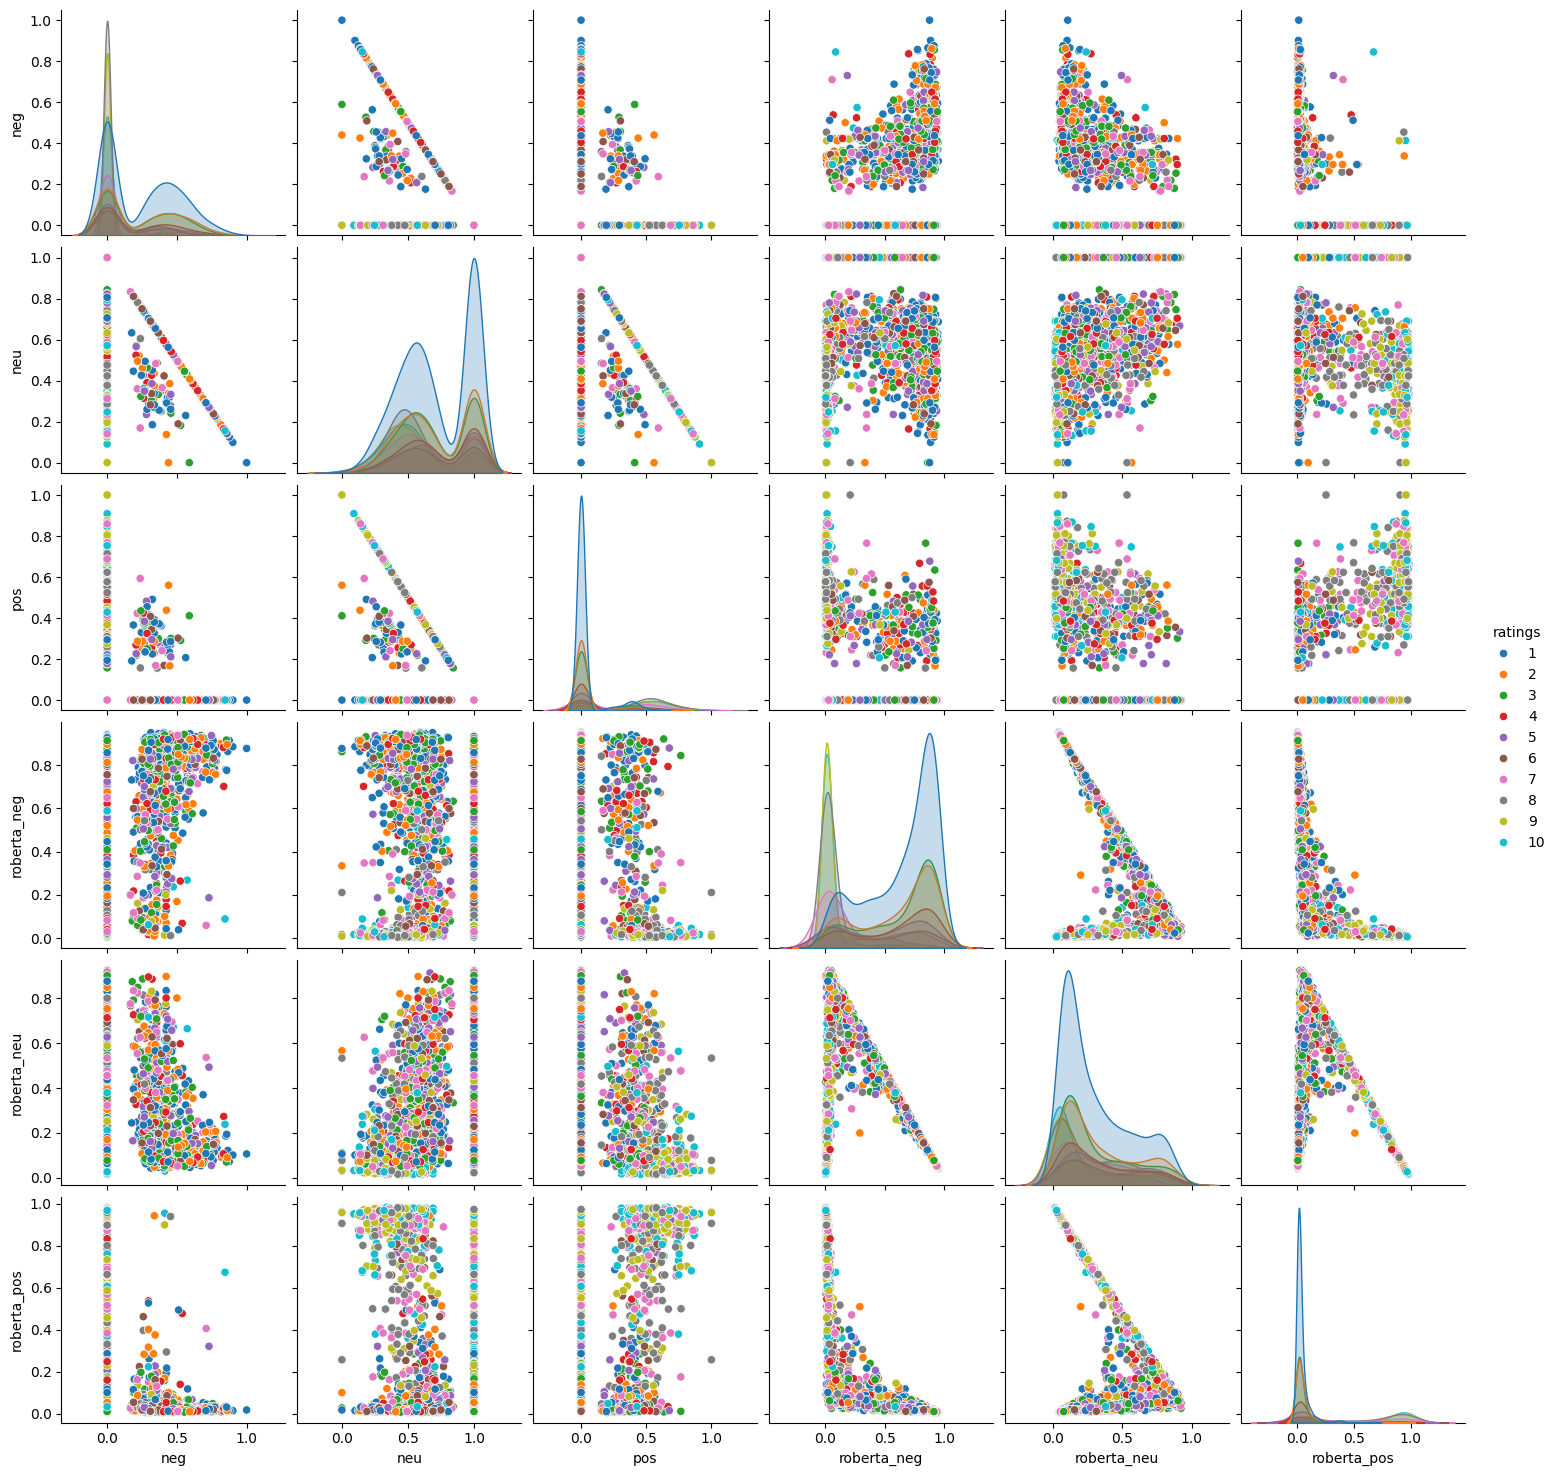

In [70]:
sns.pairplot(data=result_df,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='ratings',
            palette='tab10')
plt.show()

In [73]:
result_df.query('ratings == 1') \
    .sort_values('roberta_pos', ascending=False)['reviews'].values[0]

'finally agreed to refund my baggage charge'

In [75]:
result_df.query('ratings == 1') \
    .sort_values('pos', ascending=False)['reviews'].values[0]

'don’t trust BA with your loved ones'

In [76]:
result_df.query('ratings == 5') \
    .sort_values('neg', ascending=False)['reviews'].values[0]

'horrible food, unmotivated crew'

In [77]:
result_df.query('ratings == 5') \
    .sort_values('roberta_neg', ascending=False)['reviews'].values[0]

'horrible food, unmotivated crew'